In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/credit.csv


Há um arquivo .csv com informações acerca da adiplência (valor 0) e inadiplência (valor 1) na colunaa 'default', e o objetivo é encontrar relações a fim de entender melhor quais sãos os fatores predominantes do público inadiplente.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import FileLink
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('/kaggle/input/dataset/credit.csv')

Em seguida exploraremos os dados contidos no arquivo

In [4]:
df.head(2)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33


In [5]:
df = df.drop(columns='id')


In [6]:
df.nunique()

default                       2
idade                        45
sexo                          2
dependentes                   6
escolaridade                  5
estado_civil                  3
salario_anual                 5
tipo_cartao                   4
meses_de_relacionamento      44
qtd_produtos                  6
iteracoes_12m                 7
meses_inativo_12m             7
limite_credito             6509
valor_transacoes_12m       7044
qtd_transacoes_12m          124
dtype: int64

In [7]:
cols = [
    'sexo', 'salario_anual', 'estado_civil', 'tipo_cartao', 'escolaridade'
]
for col in cols:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print()


Coluna: sexo
['M' 'F']

Coluna: salario_anual
['$60K - $80K' 'menos que $40K' '$80K - $120K' '$40K - $60K' '$120K +']

Coluna: estado_civil
['casado' 'solteiro' 'divorciado']

Coluna: tipo_cartao
['blue' 'gold' 'silver' 'platinum']

Coluna: escolaridade
['ensino medio' 'mestrado' 'sem educacao formal' 'graduacao' 'doutorado']



In [8]:
df.describe

<bound method NDFrame.describe of       default  idade sexo  dependentes         escolaridade estado_civil  \
0           0     45    M            3         ensino medio       casado   
1           0     49    F            5             mestrado     solteiro   
2           0     51    M            3             mestrado       casado   
3           0     40    M            3  sem educacao formal       casado   
4           0     44    M            2             mestrado       casado   
...       ...    ...  ...          ...                  ...          ...   
7076        0     54    M            1         ensino medio     solteiro   
7077        0     56    F            1             mestrado     solteiro   
7078        0     50    M            2             mestrado     solteiro   
7079        1     44    F            1         ensino medio       casado   
7080        1     43    F            2             mestrado       casado   

       salario_anual tipo_cartao  meses_de_relacionam

In [9]:
inadimplentes, _ = df[df['default'] == 1].shape
total,_ = df.shape 
prop = round(100*inadimplentes/total,2)
print('A proporcão clientes inadimplentes é de',prop,'%')

A proporcão clientes inadimplentes é de 15.72 %


In [10]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598
limite_credito,7081,6509,"1.438,33",10
valor_transacoes_12m,7081,7044,"4.141,61",2


In [11]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,7081.0,0.157181,0.363997,0.0,0.0,0.0,0.0,1.0
idade,7081.0,46.347691,8.041225,26.0,41.0,46.0,52.0,73.0
dependentes,7081.0,2.337805,1.291649,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,7081.0,35.981359,8.002609,13.0,31.0,36.0,40.0,56.0
qtd_produtos,7081.0,3.819376,1.544444,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,7081.0,2.454456,1.104917,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,7081.0,2.342607,0.995104,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,7081.0,64.503319,23.809330,10.0,44.0,67.0,80.0,134.0


In [12]:
df.isna().any()

default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Agora será criada uma função lambda para limpar o formato dos dados trocando ponto por nada e vírgula por espaço

In [13]:
limpa = lambda valor: float(valor.replace(".", "").replace(",", "."))

In [14]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(limpa)
df['limite_credito'] = df['limite_credito'].apply(limpa)

In [15]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

In [16]:
# ordinalizar o salário anual

salario_mapping = {
    'menos que $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4
}

df['salario_anual_ord'] = df['salario_anual'].map(salario_mapping)

escolaridade_mapping = {
    'sem educacao formal': 1,
    'ensino medio': 2,
    'graduacao': 3,
    'mestrado': 4,
    'doutorado': 5
}
df['escolaridade_ord'] = df['escolaridade'].map(escolaridade_mapping)

In [17]:
df.head(2)

,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,salario_anual_ord,escolaridade_ord
0,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42,2,2
1,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33,0,4


**Vizualizações:**

In [18]:
rosa_claro = "#F5B6C1"
rosa_medio = "#DB7093"
rosa_escuro = "#C71585"
cores_barras = [rosa_claro, rosa_medio, rosa_escuro]

Análise categórica da escolaridade e razão do default

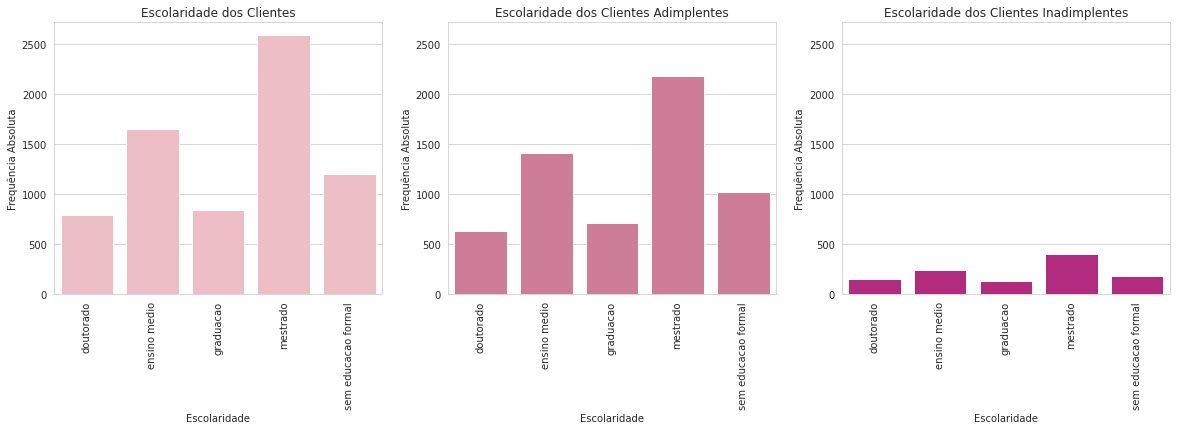

/kaggle/working/esc_histogramas.png

In [19]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo],
        color=cores_barras[eixo] )
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.savefig("esc_histogramas.png", dpi=300)

# Mostrar no output
plt.show()

# Link para download
FileLink("esc_histogramas.png")

Em seguida análise categórica do salário anual:

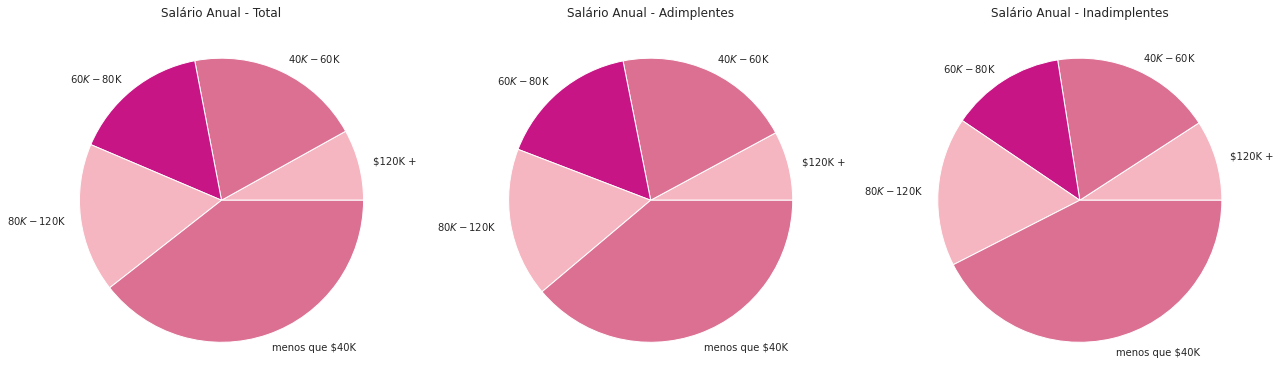

/kaggle/working/salario.png

In [20]:
s_a_total = df.groupby(['salario_anual'])['default'].count()
s_a_adimplente = df_adimplente.groupby(['salario_anual'])['default'].count()
s_a_inadimplente = df_inadimplente.groupby(['salario_anual'])['default'].count()



fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].set_title('Salário Anual - Total')
s_a_total.plot.pie(ax=axes[0], colors=cores_barras, legend=False,ylabel='')
axes[0].set_ylabel('')

axes[1].set_title('Salário Anual - Adimplentes')
s_a_adimplente.plot.pie(ax=axes[1],colors=cores_barras, legend=False,ylabel='')
axes[1].set_ylabel('')

axes[2].set_title('Salário Anual - Inadimplentes')
s_a_inadimplente.plot.pie(ax=axes[2], colors=cores_barras, legend=False,ylabel='')
axes[2].set_ylabel('')


plt.tight_layout()

fig.savefig("salario.png", dpi=300)

plt.show()


FileLink("salario.png")

Text(0, 0.5, '')

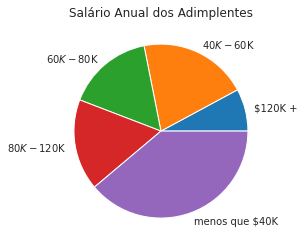

In [21]:
s_a_a = df_adimplente.groupby(['salario_anual'])['default'].count()  #salário anual adimplentes
plt.title('Salário Anual dos Adimplentes')
s_a_a.plot.pie(legend=False)
plt.ylabel('') 

Text(0, 0.5, '')

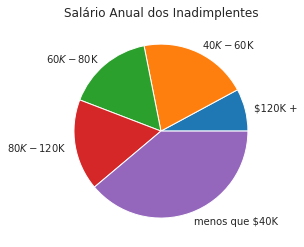

In [22]:
s_a_i = df_inadimplente.groupby(['salario_anual'])['default'].count()#salário anual inadimplentes
plt.title('Salário Anual dos Inadimplentes')
s_a_a.plot.pie(legend=False)
plt.ylabel('') 

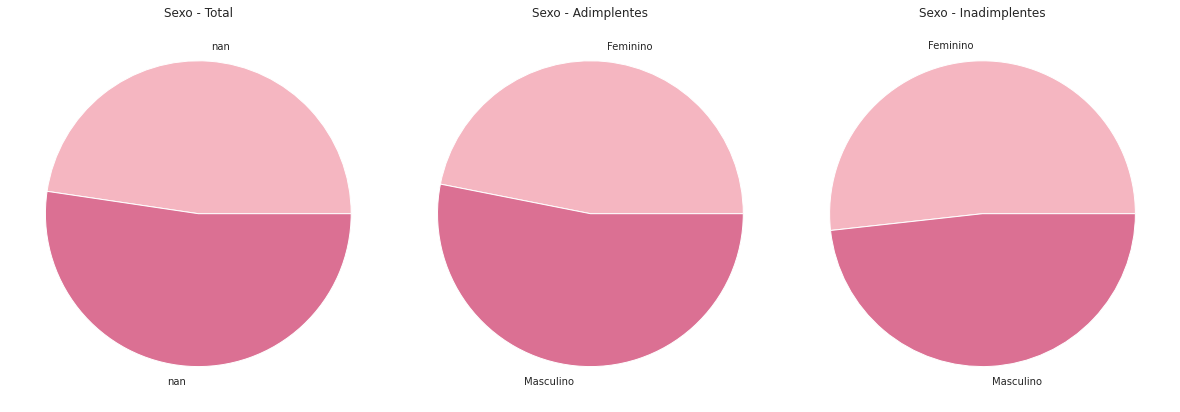

/kaggle/working/sexo.png

In [23]:

s_a_total = df.groupby(['sexo'])['default'].count()
s_a_adimplente = df_adimplente.groupby(['sexo'])['default'].count()
s_a_inadimplente = df_inadimplente.groupby(['sexo'])['default'].count()

mapeamento = {0: 'Feminino', 1: 'Masculino'}
s_a_total.index = s_a_total.index.map(mapeamento)
mapeamento = {'F': 'Feminino', 'M': 'Masculino'}
s_a_adimplente.index = s_a_adimplente.index.map(mapeamento)
s_a_inadimplente.index = s_a_inadimplente.index.map(mapeamento)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].set_title('Sexo - Total')
s_a_total.plot.pie(ax=axes[0], legend=False, colors=cores_barras, ylabel='')

axes[1].set_title('Sexo - Adimplentes')
s_a_adimplente.plot.pie(ax=axes[1], legend=False, colors=cores_barras, ylabel='')

axes[2].set_title('Sexo - Inadimplentes')
s_a_inadimplente.plot.pie(ax=axes[2], legend=False, colors=cores_barras, ylabel='')

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95)

fig.savefig("sexo.png", dpi=300)
plt.show()

from IPython.display import FileLink
FileLink("sexo.png")


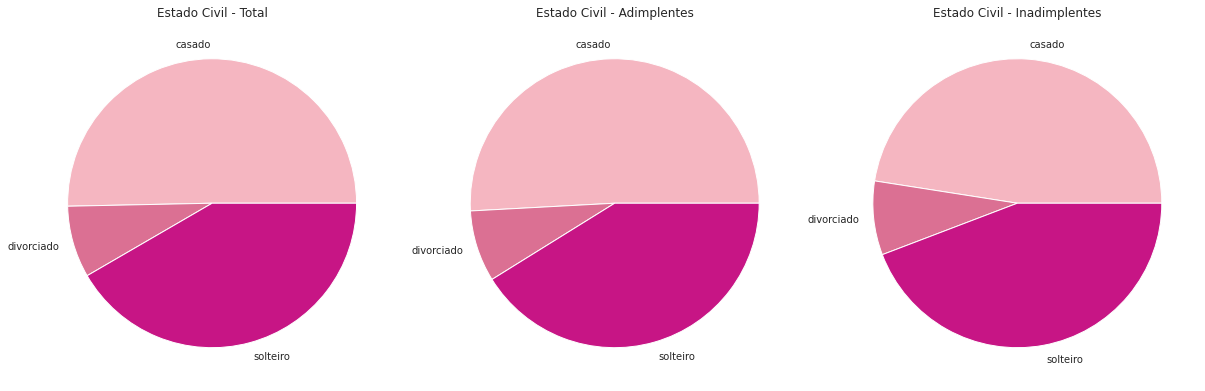

/kaggle/working/estadocivil.png

In [24]:
s_a_total = df.groupby(['estado_civil'])['default'].count()
s_a_adimplente = df_adimplente.groupby(['estado_civil'])['default'].count()
s_a_inadimplente = df_inadimplente.groupby(['estado_civil'])['default'].count()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].set_title('Estado Civil - Total')
s_a_total.plot.pie(ax=axes[0], legend=False, colors=cores_barras, ylabel='')

axes[1].set_title('Estado Civil - Adimplentes')
s_a_adimplente.plot.pie(ax=axes[1], legend=False, colors=cores_barras, ylabel='')

axes[2].set_title('Estado Civil - Inadimplentes')
s_a_inadimplente.plot.pie(ax=axes[2], legend=False, colors=cores_barras, ylabel='')

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95)
fig.savefig("estadocivil.png", dpi=300)

plt.show()

from IPython.display import FileLink
FileLink("estadocivil.png")


Visualização da Quantidade de Transações nos Últimos 12 Meses:

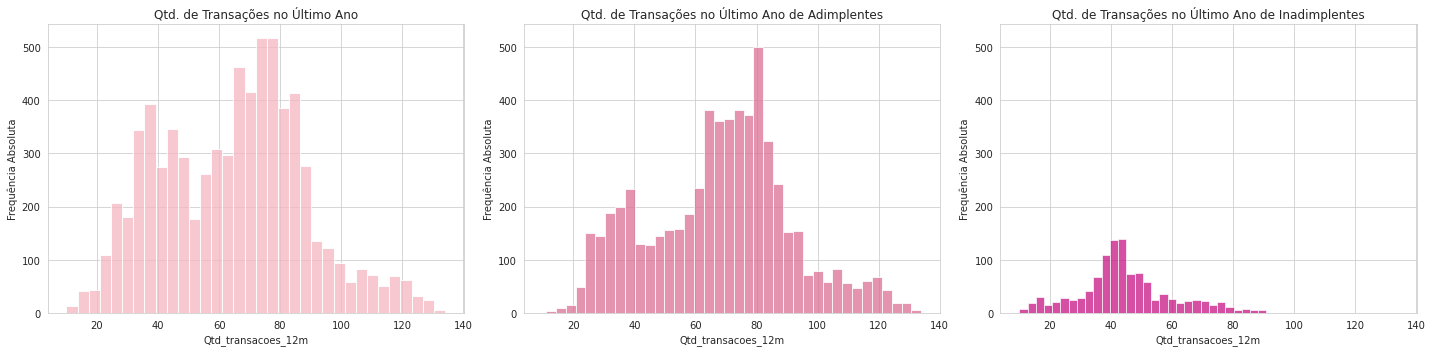

/kaggle/working/qtd_transacoes_histogramas.png

In [25]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo],
        color=cores_barras[eixo] )
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.tight_layout()


figura.savefig("qtd_transacoes_histogramas.png", dpi=300)

plt.show()

FileLink("qtd_transacoes_histogramas.png")

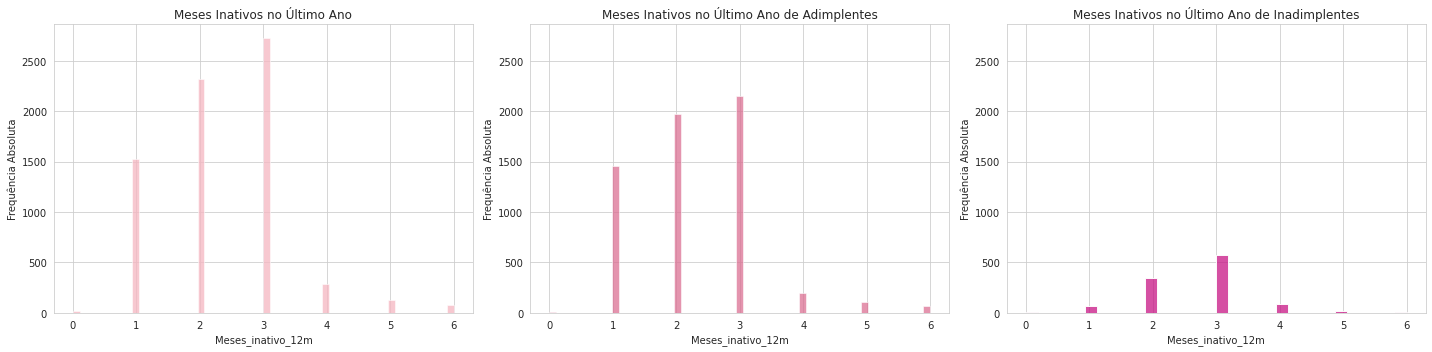

/kaggle/working/meses_inativo_12m_histogramas.png

In [26]:

coluna = 'meses_inativo_12m'
titulos = ['Meses Inativos no Último Ano', 'Meses Inativos no Último Ano de Adimplentes', 'Meses Inativos no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo],
        color=cores_barras[eixo] )
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

plt.tight_layout()


figura.savefig("meses_inativo_12m_histogramas.png", dpi=300)

plt.show()

FileLink("meses_inativo_12m_histogramas.png")

Valor das Transações nos Últimos 12 Meses:

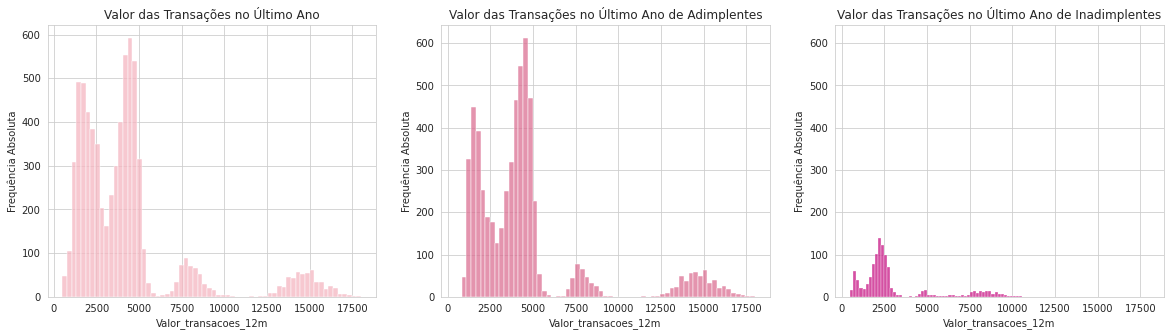

/kaggle/working/valor_transacoes_histogramas.png

In [27]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo],
        color=cores_barras[eixo] )
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.savefig("valor_transacoes_histogramas.png", dpi=300)

plt.show()

FileLink("valor_transacoes_histogramas.png")

Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses:

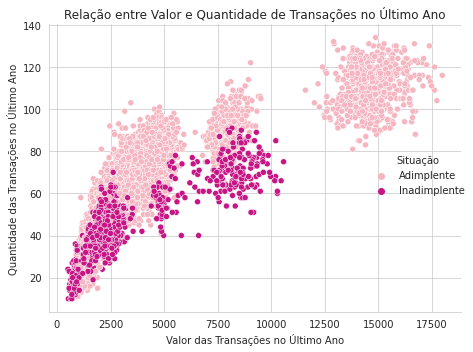

/kaggle/working/grafico_dispersao.png

In [28]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default',palette=[rosa_claro, rosa_escuro],
    height=5,   
    aspect=1.2
)
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )
f._legend.set_title("Situação")
new_labels = ["Adimplente", "Inadimplente"]
for t, l in zip(f._legend.texts, new_labels):
    t.set_text(l)
    plt.tight_layout()

f.fig.savefig("grafico_dispersao.png", dpi=200)

plt.show()

FileLink("grafico_dispersao.png")


# **Insights**

O gráfico de escolaridade de adimplentes e inadimplentes possui o mesmo formato indicando que não é um fator 
a se considerar tal como o do salário anual e o valor de transações. Sendo este último(valor de transações) zerado a inadimplência pra mais de 11.000 transações.

Por sua vez, a quantidade de transações anuais de adimplentes tem picos nos intervalos [60,80] e [20,40] transações, enquanto o inadimplentes está **apenas** no intervalo [10,90] com picos entre 30 e 50. Sendo assim clientes que realizam mais de 90 transações são todos adimplentes e clientes que realizam de 30 à 50 transações anuais possuem maior tendência a inadimplência.

Por fim, de acordo com o gráfico de dispersões reforça que acima de 90 transações e valores acima de 11.000 reais só há adimplentes.

In [29]:
df_novo = pd.DataFrame({'valor_transacoes_12m': df['valor_transacoes_12m'],
                        'qtd_transacoes_12m': df['qtd_transacoes_12m'],
                        'default': df['default']})
df_novo.head(2)

,valor_transacoes_12m,qtd_transacoes_12m,default
0,1144.90,42,0
1,1291.45,33,0


In [30]:
X = df_novo[['valor_transacoes_12m', 'qtd_transacoes_12m']].values
y = df_novo['default'].values

*O parâmetro test_size é usado para especificar a proporção do conjunto de dados que será atribuída ao conjunto de teste. Ele define a fração do conjunto de dados que será reservada para testar o modelo de aprendizado de máquina após o treinamento.*

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# modelos com pesos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=0, class_weight='balanced'),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
    )
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    resultados[nome] = {
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Matriz de Confusão': cm
    }

In [34]:
for nome, metricas in resultados.items():
    print(f"\n🔹 Modelo: {nome}")
    print(f"Acurácia: {metricas['Acurácia']:.2%}")
    print(f"Precisão: {metricas['Precisão']:.2%}")
    print(f"Recall: {metricas['Recall']:.2%}")
    print(f"F1-Score: {metricas['F1-Score']:.2%}")
    print("Matriz de Confusão:\n", metricas['Matriz de Confusão'])


🔹 Modelo: Logistic Regression
Acurácia: 75.51%
Precisão: 35.28%
Recall: 82.04%
F1-Score: 49.34%
Matriz de Confusão:
 [[901 310]
 [ 37 169]]

🔹 Modelo: Random Forest
Acurácia: 89.41%
Precisão: 64.00%
Recall: 62.14%
F1-Score: 63.05%
Matriz de Confusão:
 [[1139   72]
 [  78  128]]

🔹 Modelo: k-NN
Acurácia: 89.27%
Precisão: 68.24%
Recall: 49.03%
F1-Score: 57.06%
Matriz de Confusão:
 [[1164   47]
 [ 105  101]]

🔹 Modelo: XGBoost
Acurácia: 86.10%
Precisão: 51.50%
Recall: 75.24%
F1-Score: 61.14%
Matriz de Confusão:
 [[1065  146]
 [  51  155]]


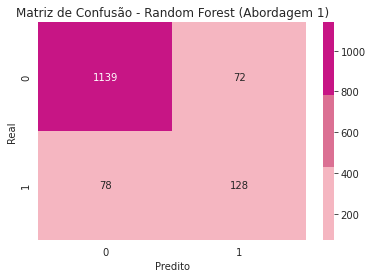

/kaggle/working/xgboost_matriz_1.png

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(resultados['Random Forest']['Matriz de Confusão'], annot=True, fmt="d", cmap = cores_barras)
plt.title("Matriz de Confusão - Random Forest (Abordagem 1)")
plt.xlabel("Predito")
plt.ylabel("Real")

plt.savefig("xgboost_matriz_1.png", dpi=300)


# Mostrar no output
plt.show()

# Link para download
FileLink("xgboost_matriz_1.png")

### Abordagem 2 - Somente Numéricas

In [36]:
num_vars = [
    'idade',
    'dependentes',
    'meses_de_relacionamento',
    'qtd_produtos',
    'meses_inativo_12m',
    'limite_credito',
    'valor_transacoes_12m',
    'qtd_transacoes_12m'
]
X = df[num_vars]
y = df['default'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
# modelos com pesos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=0, class_weight='balanced'),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
    )
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    resultados[nome] = {
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Matriz de Confusão': cm
    }

In [39]:
for nome, metricas in resultados.items():
    print(f"\n🔹 Modelo: {nome}")
    print(f"Acurácia: {metricas['Acurácia']:.2%}")
    print(f"Precisão: {metricas['Precisão']:.2%}")
    print(f"Recall: {metricas['Recall']:.2%}")
    print(f"F1-Score: {metricas['F1-Score']:.2%}")
    print("Matriz de Confusão:\n", metricas['Matriz de Confusão'])


🔹 Modelo: Logistic Regression
Acurácia: 75.72%
Precisão: 34.80%
Recall: 76.70%
F1-Score: 47.88%
Matriz de Confusão:
 [[915 296]
 [ 48 158]]

🔹 Modelo: Random Forest
Acurácia: 93.93%
Precisão: 85.29%
Recall: 70.39%
F1-Score: 77.13%
Matriz de Confusão:
 [[1186   25]
 [  61  145]]

🔹 Modelo: k-NN
Acurácia: 87.65%
Precisão: 60.40%
Recall: 43.69%
F1-Score: 50.70%
Matriz de Confusão:
 [[1152   59]
 [ 116   90]]

🔹 Modelo: XGBoost
Acurácia: 94.14%
Precisão: 77.09%
Recall: 84.95%
F1-Score: 80.83%
Matriz de Confusão:
 [[1159   52]
 [  31  175]]


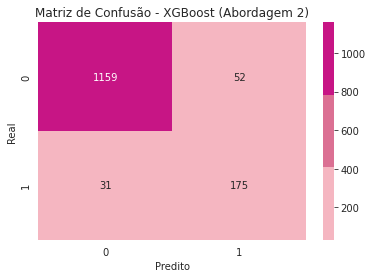

/kaggle/working/xgboost_matriz_2.png

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(resultados['XGBoost']['Matriz de Confusão'], annot=True, fmt="d", cmap=cores_barras)
plt.title("Matriz de Confusão - XGBoost (Abordagem 2)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.savefig("xgboost_matriz_2.png", dpi=300)

# Mostrar no output
plt.show()

# Link para download
FileLink("xgboost_matriz_2.png")

### Abordagem 3 - Todas as variáveis

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
nominal_vars = [
    'estado_civil',
    'sexo',
    'tipo_cartao'
]

lb = LabelEncoder()

for col in nominal_vars:
    df[col] = lb.fit_transform(df[col])

In [43]:
essas = [
    'salario_anual','escolaridade'    
]
df = df.drop(essas,axis=1)

In [44]:
X = df.drop(columns='default')
y = df['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
# modelos com pesos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=0, class_weight='balanced'),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()
    )
}

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    resultados[nome] = {
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Matriz de Confusão': cm
    }

In [46]:
for nome, metricas in resultados.items():
    print(f"\n🔹 Modelo: {nome}")
    print(f"Acurácia: {metricas['Acurácia']:.2%}")
    print(f"Precisão: {metricas['Precisão']:.2%}")
    print(f"Recall: {metricas['Recall']:.2%}")
    print(f"F1-Score: {metricas['F1-Score']:.2%}")
    print("Matriz de Confusão:\n", metricas['Matriz de Confusão'])


🔹 Modelo: Logistic Regression
Acurácia: 77.42%
Precisão: 36.74%
Recall: 76.70%
F1-Score: 49.69%
Matriz de Confusão:
 [[939 272]
 [ 48 158]]

🔹 Modelo: Random Forest
Acurácia: 93.72%
Precisão: 87.74%
Recall: 66.02%
F1-Score: 75.35%
Matriz de Confusão:
 [[1192   19]
 [  70  136]]

🔹 Modelo: k-NN
Acurácia: 87.65%
Precisão: 60.40%
Recall: 43.69%
F1-Score: 50.70%
Matriz de Confusão:
 [[1152   59]
 [ 116   90]]

🔹 Modelo: XGBoost
Acurácia: 94.21%
Precisão: 77.19%
Recall: 85.44%
F1-Score: 81.11%
Matriz de Confusão:
 [[1159   52]
 [  30  176]]


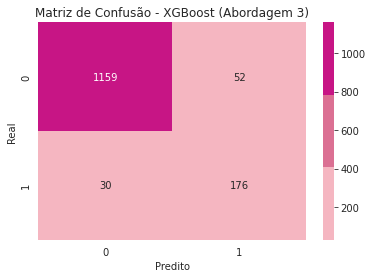

/kaggle/working/xgboost_matriz_3.png

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(resultados['XGBoost']['Matriz de Confusão'], annot=True, fmt="d", cmap=cores_barras )
plt.title("Matriz de Confusão - XGBoost (Abordagem 3)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.savefig("xgboost_matriz_3.png", dpi=300)

# Mostrar no output
plt.show()

# Link para download
FileLink("xgboost_matriz_3.png")

## Conclusão 
* A primeira abordagem apesar de ter métricas maiores de F1 e acurácia modelada pelo Random Forest, indicou que o modelo XGBoost oferece menos risco de deixar passar inadimplentes quando se olha o recall, e as demais abordagens apresentaram desempenho satisfatório na previsão da inadimplência.
* Abordagem 3, que incluiu todas as variáveis disponíveis, obteve ligeira melhora no F1-Score em relação à Abordagem 2.
* Entretanto, a análise exploratória revelou que variáveis adicionais como estado civil, sexo e tipo de cartão não apresentavam diferenças expressivas entre os grupos de adimplentes e inadimplentes.
* O modelo com melhor desempenho foi o XGBoost, com F1-Score de 81.11\%.

**Conclusão principal:**

A inclusão de variáveis pouco discriminativas não trouxe ganho substancial, reforçando a importância da seleção criteriosa de atributos.
    
